# EDA - Exploratory Data Analysis to understand the data, spot patterns, and prepare for modeling

# Basic data overview

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('final_data.csv')

In [ ]:
# Basic Data Overview
df.head()  # look at first few rows
df.info()  # check datatypes and missing values
df.describe()  # summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Settlement                          731 non-null    object 
 1   SocioeconomicCluster                731 non-null    int64  
 2   PercentTechStudents                 731 non-null    float64
 3   PercentTeachersMasters              731 non-null    float64
 4   PercentHighSchoolTeachersMasters    731 non-null    float64
 5   PercentRegionalAccommodations       731 non-null    float64
 6   PercentInstitutionalAccommodations  731 non-null    float64
 7   PersistenceRate                     731 non-null    float64
 8   DropoutRate                         731 non-null    float64
 9   PercentShakdQuestionnaires          731 non-null    float64
 10  PercentBagrutEligible               731 non-null    float64
 11  PercentBagrutEligibleRegular        731 non-n

,SocioeconomicCluster,PercentTechStudents,PercentTeachersMasters,PercentHighSchoolTeachersMasters,PercentRegionalAccommodations,PercentInstitutionalAccommodations,PersistenceRate,DropoutRate,PercentShakdQuestionnaires,PercentBagrutEligible,...,OutstandingToTotal,DropoutToPersistenceRatio,5UnitsIndex,DropoutRiskScore,SchoolExcellentScore,5UnitsIndexRegular,SchoolExcellentScoreRegular,4UnitsIndex,4UnitsIndexRegular,CrimeRate
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,...,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.00000,731.000000,731.000000
mean,4.623803,0.454664,0.440605,0.507192,0.177606,0.323956,0.836075,0.007922,0.016325,0.776362,...,0.145108,0.009817,0.283173,0.010625,0.228427,0.299346,0.241562,0.22878,0.238486,0.036739
std,2.299954,0.187183,0.094083,0.127967,0.121229,0.181626,0.113131,0.006551,0.028169,0.168305,...,0.100344,0.009220,0.148770,0.007479,0.125552,0.155871,0.131342,0.06690,0.068380,0.016185
min,1.000000,0.000000,0.028419,0.000000,0.000000,0.000000,0.307700,0.000000,0.000000,0.036000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01900,0.020000,0.004650
25%,3.000000,0.337559,0.400782,0.455343,0.082274,0.197094,0.781350,0.003621,0.000000,0.704000,...,0.073857,0.004260,0.175000,0.005492,0.143833,0.186500,0.151833,0.19250,0.203000,0.024993
50%,4.000000,0.452632,0.448916,0.527273,0.153846,0.294118,0.867800,0.006505,0.005618,0.821000,...,0.125418,0.007586,0.264500,0.008925,0.207333,0.283000,0.220667,0.23050,0.239000,0.034634
75%,7.000000,0.576049,0.494031,0.586352,0.270841,0.446278,0.911700,0.010229,0.017857,0.895500,...,0.198186,0.012438,0.375000,0.014057,0.294667,0.398750,0.314000,0.26725,0.277000,0.045421
max,10.000000,1.000000,0.750000,0.782609,0.787013,0.961290,1.000000,0.047297,0.261538,1.000000,...,0.701933,0.114300,0.733000,0.047297,0.718667,0.750000,0.734667,0.46000,0.489000,0.115068


In [ ]:
# Number of rows and columns
print(f"Dataset shape: {df.shape}")  # (rows, columns)

# Number of features (columns)
print(f"Number of features: {len(df.columns)}")

# Breakdown of feature types
print("\nFeature types:")
print(df.dtypes.value_counts())

# Number of unique settlements
print("Unique settlements:", df['Settlement'].nunique())

Dataset shape: (731, 43)
Number of features: 43

Feature types:
float64    40
int64       2
object      1
Name: count, dtype: int64
Unique settlements: 147


In [ ]:
# Check how many observations per year
print("\nObservations per year:")
print(df['Year'].value_counts().sort_index())

# Check how many settlements have continuous data
year_counts = df.groupby('Settlement')['Year'].nunique()
print(f"\nSettlements with complete data: {sum(year_counts == len(df['Year'].unique()))}/{len(year_counts)}")


Observations per year:
Year
2019    146
2020    146
2021    146
2022    146
2023    147
Name: count, dtype: int64

Settlements with complete data: 146/147


After removing not matching towns in both datasets, we haven't any null value

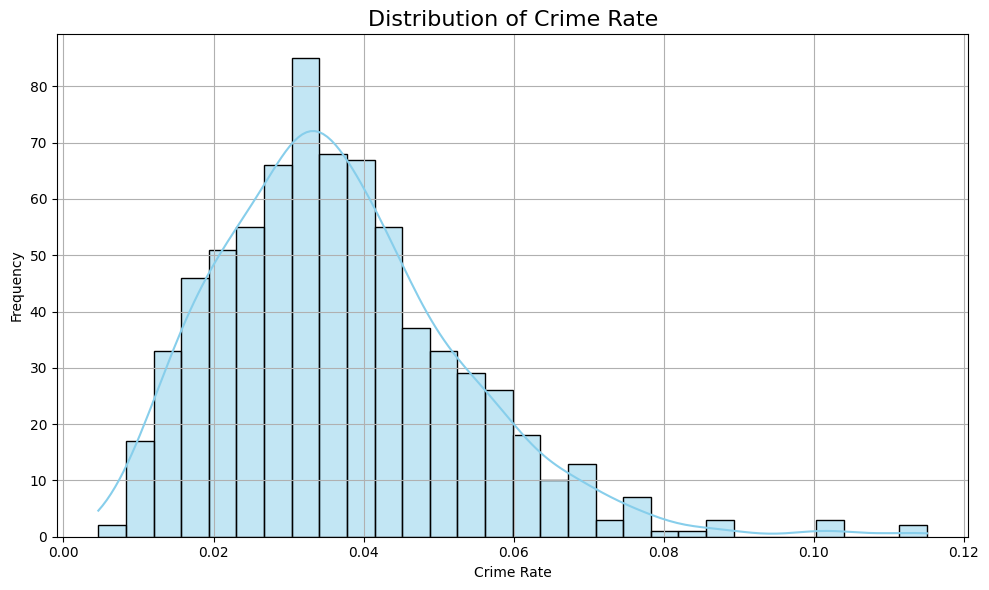

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df_copy['CrimeRate'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Crime Rate', fontsize=16)
plt.xlabel('Crime Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

**Summary: Distribution of Crime Rate**

The plot shows how crime rates are distributed across all the cities in the dataset.

 - The distribution appears to be right-skewed (positively skewed), meaning that most cities have lower crime rates, while a smaller number of cities have very high crime rates.

 - The peak of the distribution is around the lower values, which indicates that low to moderate crime is more common.

 - There is a long tail on the right side, suggesting a few cities with unusually high crime.

# Correlation analysis

In [ ]:
# Copy of dataset without column year
df_copy = df.drop(columns=['Year', 'Settlement']).copy()

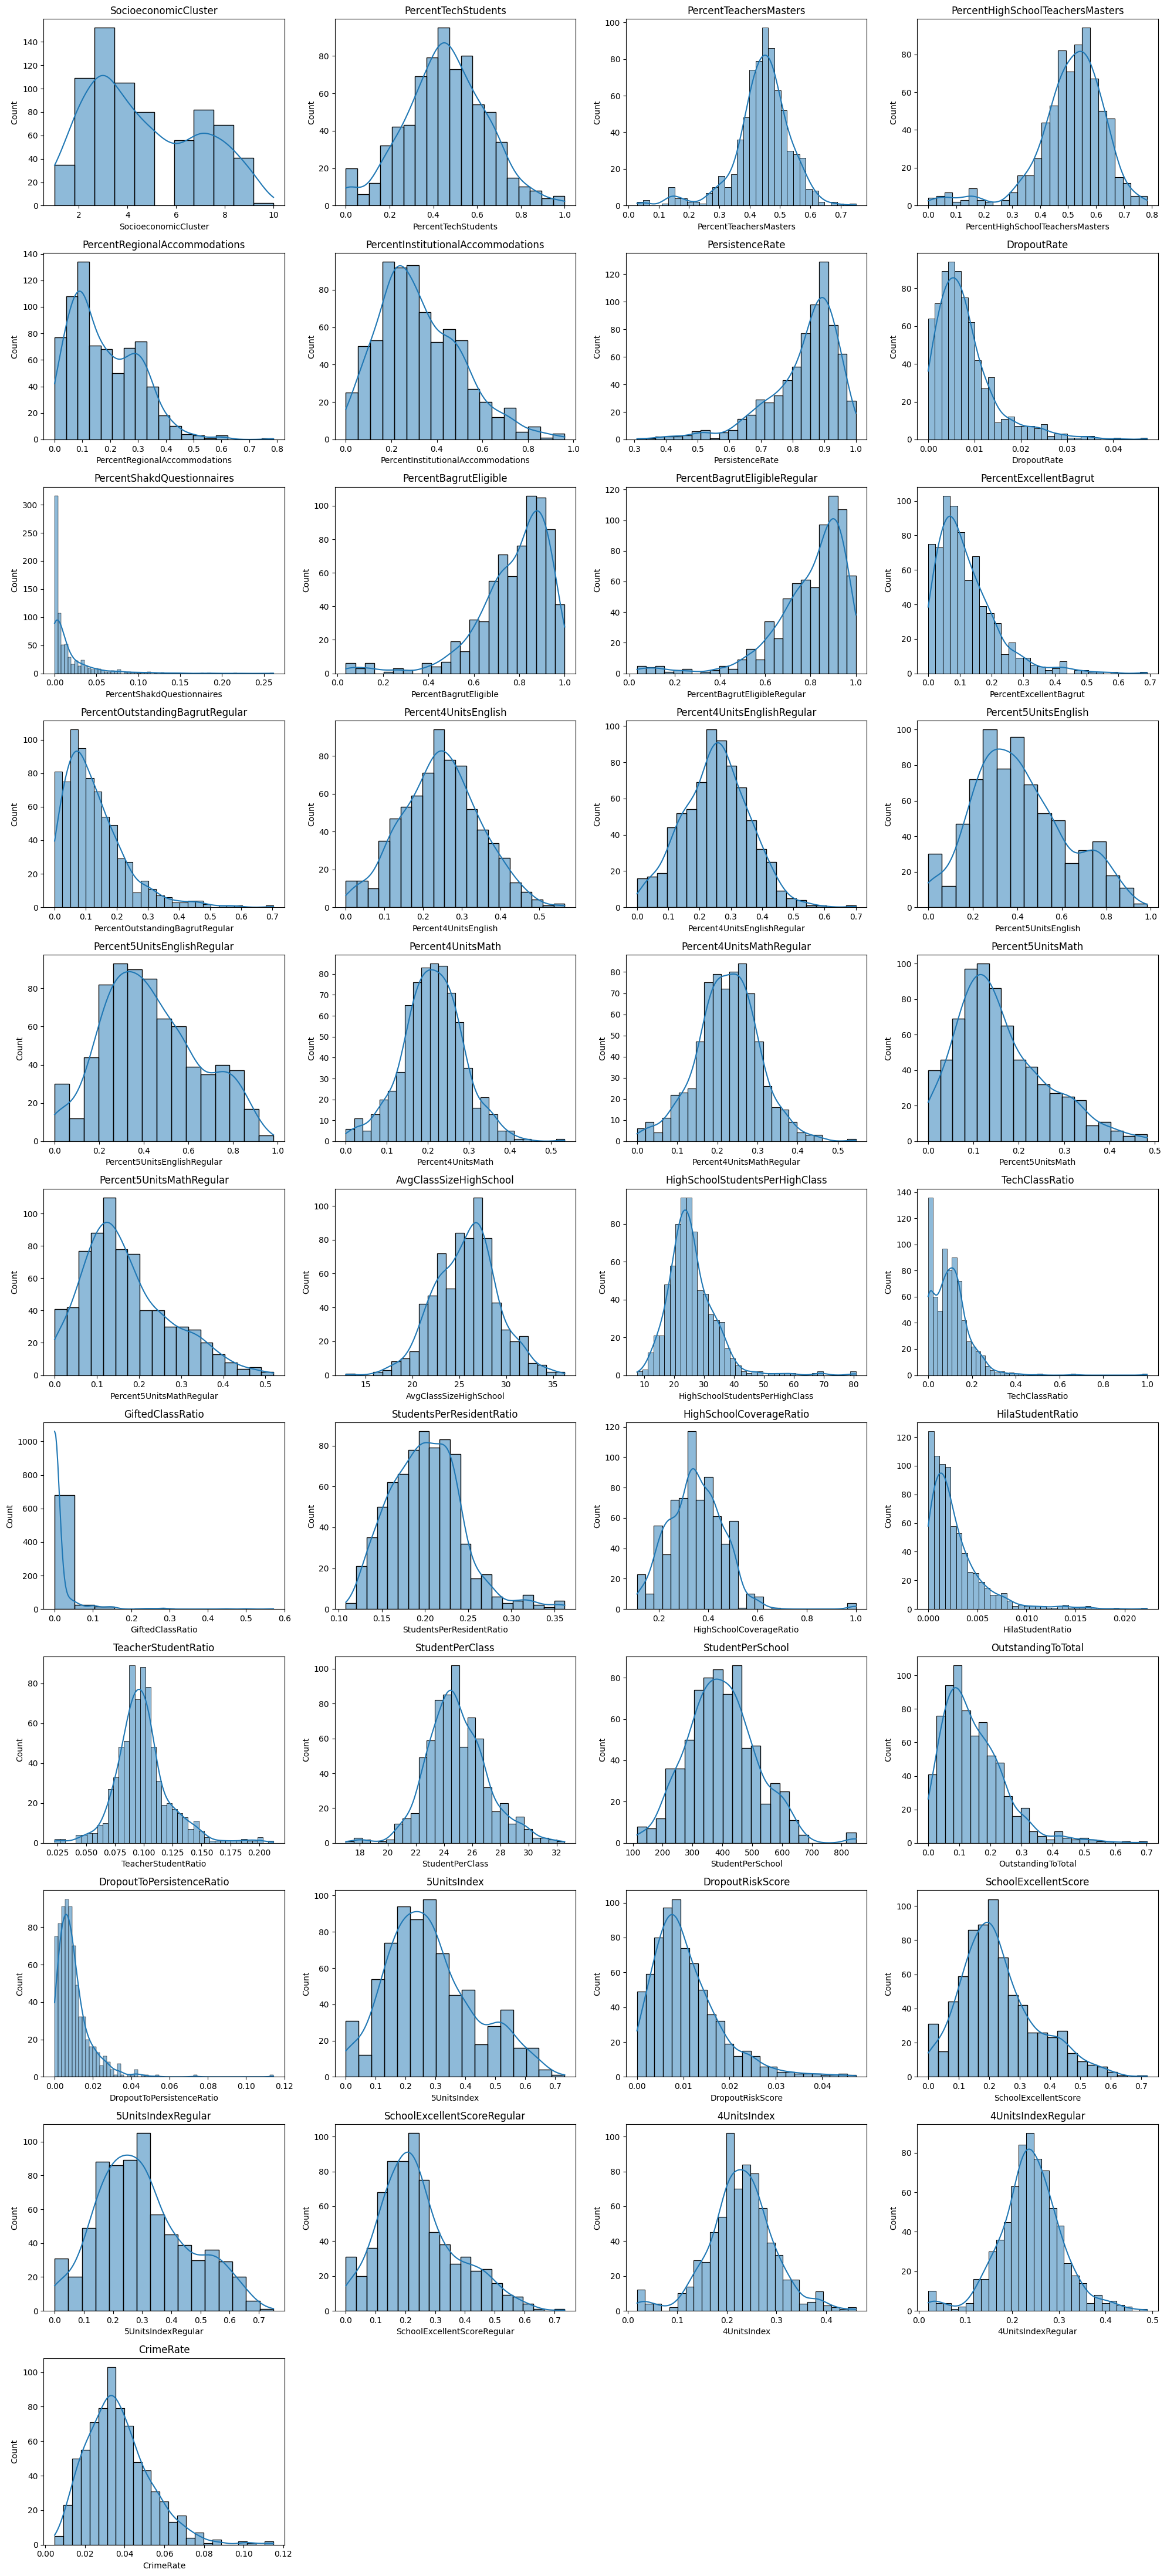

In [ ]:
# distribution of features plots
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns

# Set up grid size
n_cols = 4  # number of plots per row
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(numeric_cols):
    sns.histplot(df_copy[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(col)

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
#  Check normality of features
from scipy.stats import shapiro, normaltest

def check_normality(df, cols):
    normality_results = {}
    for col in cols:
        data = df[col].dropna()
        if len(data) < 3:
            normality_results[col] = False
            continue

        # Use Shapiro if sample size <= 5000 else normaltest
        if len(data) <= 5000:
            p_val = shapiro(data).pvalue
        else:
            try:
                p_val = normaltest(data).pvalue
            except:
                p_val = 0  # fail if error

        normality_results[col] = p_val > 0.05  # True if normal
    return normality_results

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
normality = check_normality(df, numeric_cols)

# Show which features are normal or not
for feature, is_normal in normality.items():
    print(f"{feature}: {'Normal' if is_normal else 'Not Normal'}")


SocioeconomicCluster: Not Normal
PercentTechStudents: Not Normal
PercentTeachersMasters: Not Normal
PercentHighSchoolTeachersMasters: Not Normal
PercentRegionalAccommodations: Not Normal
PercentInstitutionalAccommodations: Not Normal
PersistenceRate: Not Normal
DropoutRate: Not Normal
PercentShakdQuestionnaires: Not Normal
PercentBagrutEligible: Not Normal
PercentBagrutEligibleRegular: Not Normal
PercentExcellentBagrut: Not Normal
PercentOutstandingBagrutRegular: Not Normal
Percent4UnitsEnglish: Normal
Percent4UnitsEnglishRegular: Not Normal
Percent5UnitsEnglish: Not Normal
Percent5UnitsEnglishRegular: Not Normal
Percent4UnitsMath: Not Normal
Percent4UnitsMathRegular: Not Normal
Percent5UnitsMath: Not Normal
Percent5UnitsMathRegular: Not Normal
AvgClassSizeHighSchool: Normal
Year: Not Normal
HighSchoolStudentsPerHighClass: Not Normal
TechClassRatio: Not Normal
GiftedClassRatio: Not Normal
StudentsPerResidentRatio: Not Normal
HighSchoolCoverageRatio: Not Normal
HilaStudentRatio: Not Nor

Decide correlation method for each feature relative to CrimeRate, If both CrimeRate and feature are normal, use Pearson, else use Spearman (more robust for non-normal)

In [ ]:
# CrimeRate normality
crime_normal = normality['CrimeRate']

corr_method = {}
for feature in numeric_cols:
    if feature == 'CrimeRate':
        continue
    # if both normal → Pearson, else Spearman
    if crime_normal and normality[feature]:
        corr_method[feature] = 'pearson'
    else:
        corr_method[feature] = 'spearman'

In [ ]:
# Calculate correlations with CrimeRate using the chosen method
correlations = {}

for feature, method in corr_method.items():
    corr = df[[feature, 'CrimeRate']].dropna().corr(method=method).iloc[0, 1]
    correlations[feature] = corr

# Convert to DataFrame for better display
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])
corr_df = corr_df.sort_values(by='Correlation', key=abs, ascending=False)

print(corr_df.head(10))  # top 10 strongest correlations by absolute value


                              Correlation
TechClassRatio                   0.378827
StudentPerClass                 -0.359396
AvgClassSizeHighSchool          -0.349164
StudentsPerResidentRatio        -0.327991
PercentBagrutEligible           -0.271918
PercentBagrutEligibleRegular    -0.270297
Percent4UnitsMath               -0.266442
Percent4UnitsMathRegular        -0.263170
Percent5UnitsMathRegular        -0.254994
Percent5UnitsMath               -0.253458


**Summary of Correlation Analysis:**

Most of the top 10 features that are strongly connected to the crime rate have negative correlations. This means that when these features have higher values, the crime rate tends to be lower.

For example, features like StudentPerClass (number of students per class), AvgClassSizeHighSchool (average high school class size), StudentsPerResidentRatio (how many students there are compared to the total population), and several measures of how many students pass their exams (like PercentBagrutEligible and Percent4UnitsMath) show this pattern. So, better educational results and some school characteristics usually go hand-in-hand with less crime in a community.

The only exception is TechClassRatio (the share of tech classes), which has a positive correlation with crime rate — meaning places with more tech classes tend to have higher crime rates. This is interesting and could be worth exploring more.

# Feature Distribution by Crime Level

We split the data into high crime vs low crime areas (e.g., using the median) and compare feature distributions.

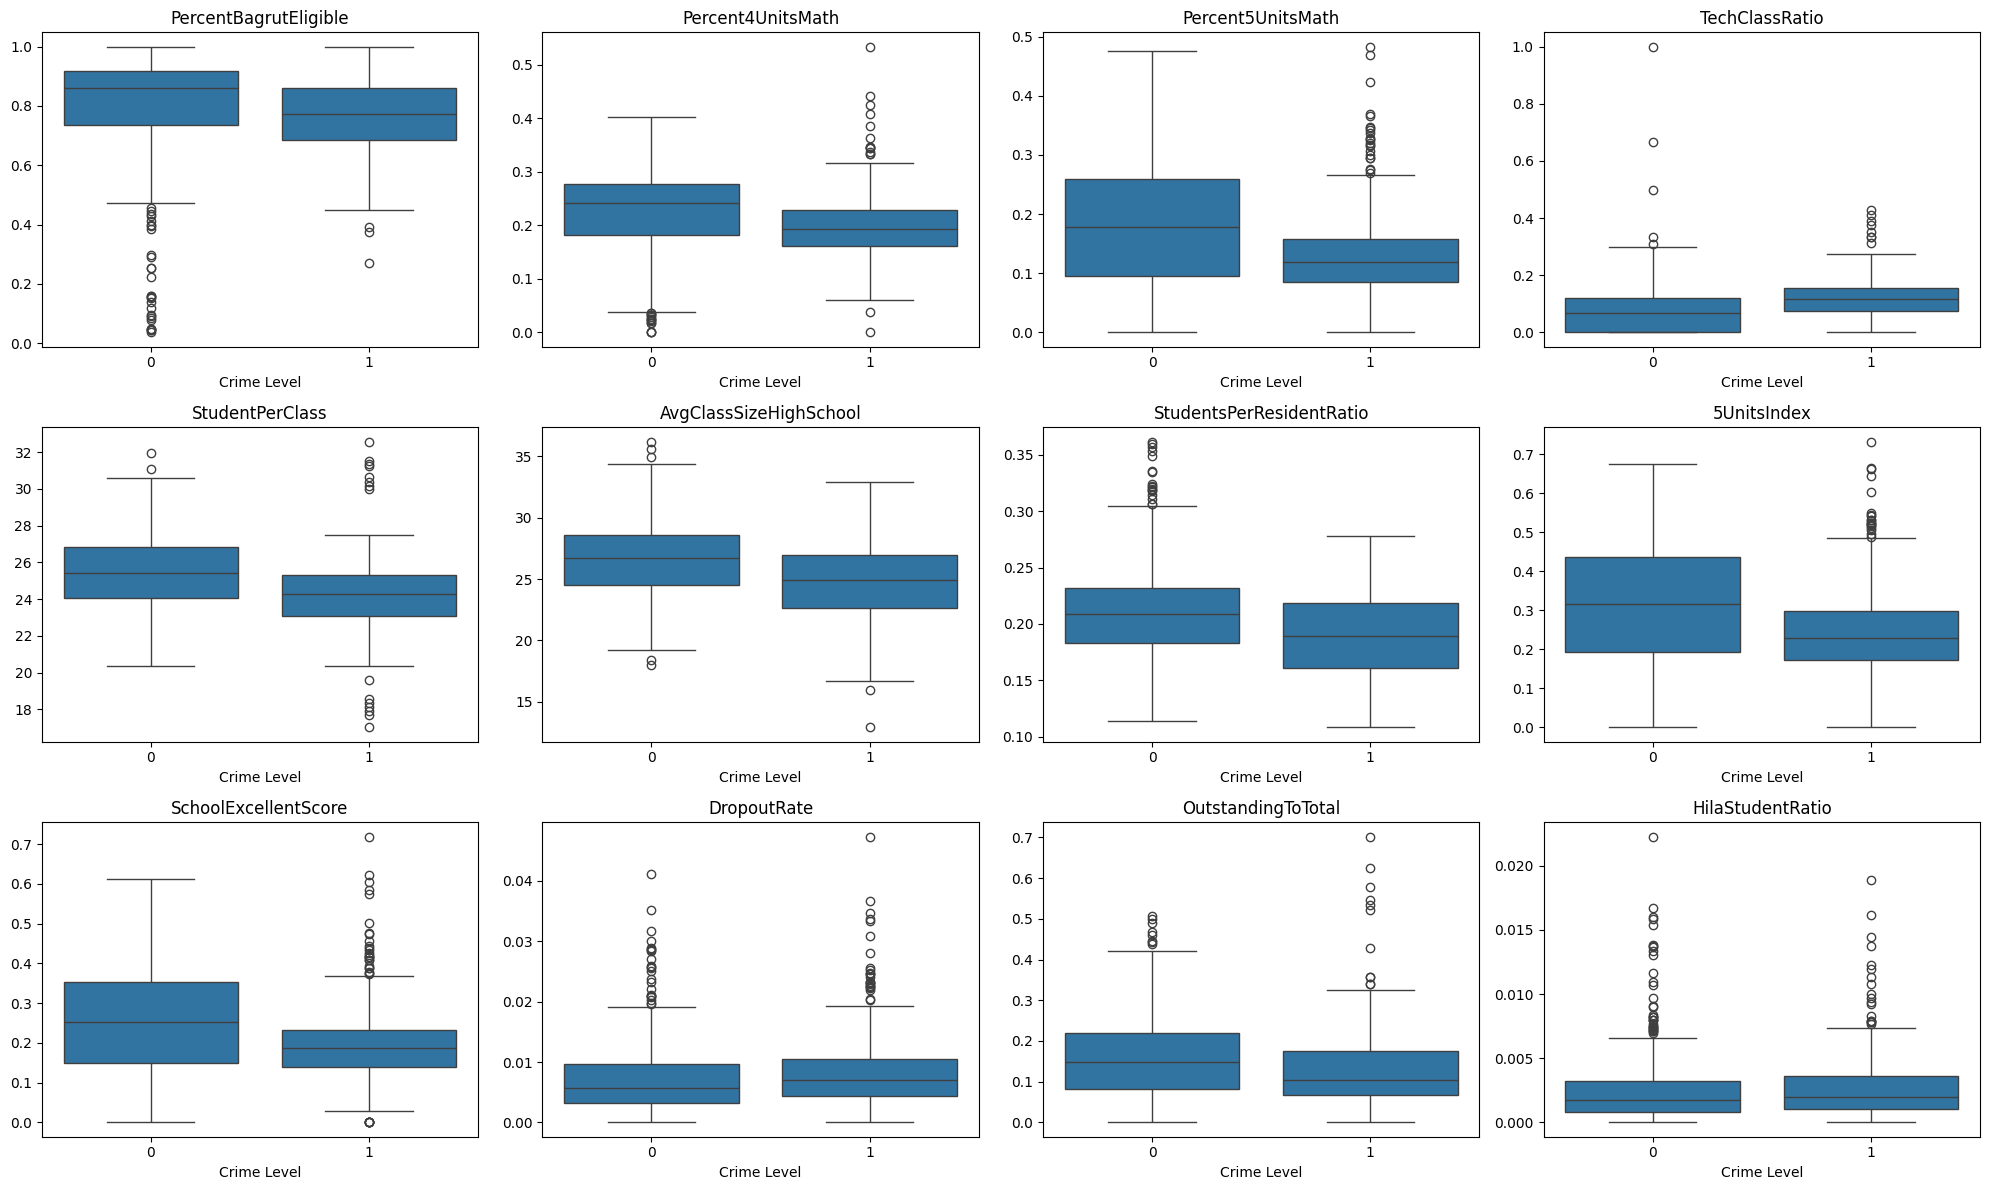

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_crime_level = df_copy.copy()
df_crime_level['CrimeLevel'] = (df_crime_level['CrimeRate'] > df_crime_level['CrimeRate'].median()).astype(int)

# Define more features to compare
features = [
    'PercentBagrutEligible',
    'Percent4UnitsMath',
    'Percent5UnitsMath',
    'TechClassRatio',
    'StudentPerClass',
    'AvgClassSizeHighSchool',
    'StudentsPerResidentRatio',
    '5UnitsIndex',
    'SchoolExcellentScore',
    'DropoutRate',
    'OutstandingToTotal',
    'HilaStudentRatio'

]

# Create subplots (adjust grid size based on number of features)
n_cols = 4
n_rows = (len(features) + n_cols - 1) // n_cols  # ceiling division
plt.figure(figsize=(5 * n_cols, 4 * n_rows))

# Plot each feature
for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=df_crime_level, x='CrimeLevel', y=feature)
    plt.title(feature.replace('_', ' '))
    plt.xlabel('Crime Level')
    plt.ylabel('')

plt.tight_layout()
plt.show()

**Summary of Boxplot Analysis (Crime Level vs. Educational & Socio-Economic Features):**

In this analysis, we compared several educational and socio-economic features across Israeli communities with high and low crime levels, where “high crime” means above the median crime rate.

Most features are higher in low-crime areas, including:
 - PercentBagrutEligible, 4/5 Units Math, and SchoolExcellentScore — all reflect academic success.

 - StudentsPerResidentRatio, StudentPerClass, and AvgClassSizeHighSchool — indicators of educational engagement and demographic factors.

 - These findings suggest that higher academic achievement and better educational environments are associated with lower crime.


 Features linked to higher crime (as expected):
 - HilaStudentRatio – A higher share of students in alternative education programs (often used for at-risk youth).
 - DropoutRate – More students leaving school before finishing are found in higher-crime areas.

One important exception:
 - TechClassRatio – Surprisingly, areas with a higher share of technological/vocational education tend to have higher crime rates. Like in correlation analysis we see that this feature with negative correlation.